In [725]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [726]:
scraped_data = pd.read_csv(r'../../data/scraped_dataset.csv')
print(scraped_data.head(5))

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250N

In [727]:
scraped_data['company'] = scraped_data['name'].str.split().str[0]

In [728]:
scraped_data['company'].value_counts()

company
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

In [729]:
clean_data = scraped_data[scraped_data['company'].map(scraped_data['company'].value_counts()) >= 40]

In [730]:
clean_data['company'].value_counts()

company
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Name: count, dtype: int64

In [731]:
clean_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,company
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,Hyundai
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,Hyundai
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,Maruti
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,Tata


In [732]:
clean_data.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          220
engine           220
max_power        214
torque           221
seats            220
company            0
dtype: int64

In [733]:
clean_data['engine'].value_counts()

engine
1248 CC    1017
1197 CC     832
998 CC      453
796 CC      441
2179 CC     387
           ... 
2197 CC       1
1422 CC       1
1590 CC       1
2496 CC       1
1950 CC       1
Name: count, Length: 111, dtype: int64

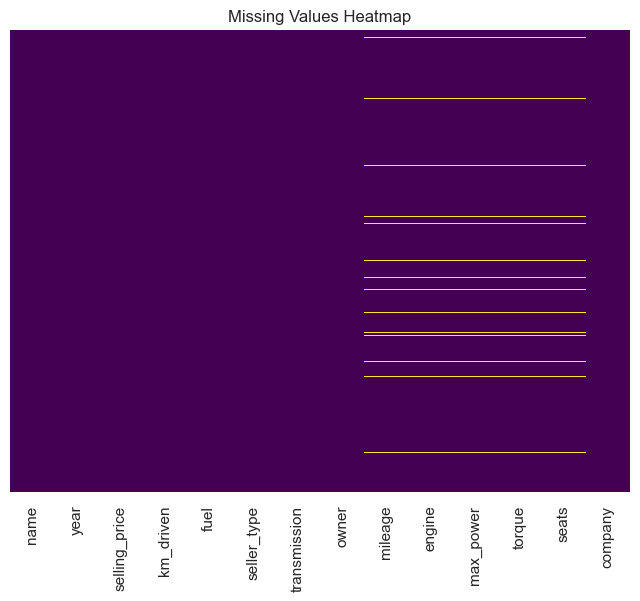

In [734]:
#Checking for Missing Values

plt.figure(figsize=(8, 6))
sns.heatmap(clean_data.isnull(), cbar=False, cmap='viridis', yticklabels=False, xticklabels=clean_data.columns)
plt.title('Missing Values Heatmap')
plt.show()

In [735]:
missing_data = clean_data.isnull()

for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts())
    print("")

name
False    8015
Name: count, dtype: int64

year
False    8015
Name: count, dtype: int64

selling_price
False    8015
Name: count, dtype: int64

km_driven
False    8015
Name: count, dtype: int64

fuel
False    8015
Name: count, dtype: int64

seller_type
False    8015
Name: count, dtype: int64

transmission
False    8015
Name: count, dtype: int64

owner
False    8015
Name: count, dtype: int64

mileage
False    7795
True      220
Name: count, dtype: int64

engine
False    7795
True      220
Name: count, dtype: int64

max_power
False    7801
True      214
Name: count, dtype: int64

torque
False    7794
True      221
Name: count, dtype: int64

seats
False    7795
True      220
Name: count, dtype: int64

company
False    8015
Name: count, dtype: int64



In [736]:
clean_data.shape

(8015, 14)

In [737]:
#Removing missing values

clean_data = clean_data.dropna()

In [738]:
clean_data.shape

(7794, 14)

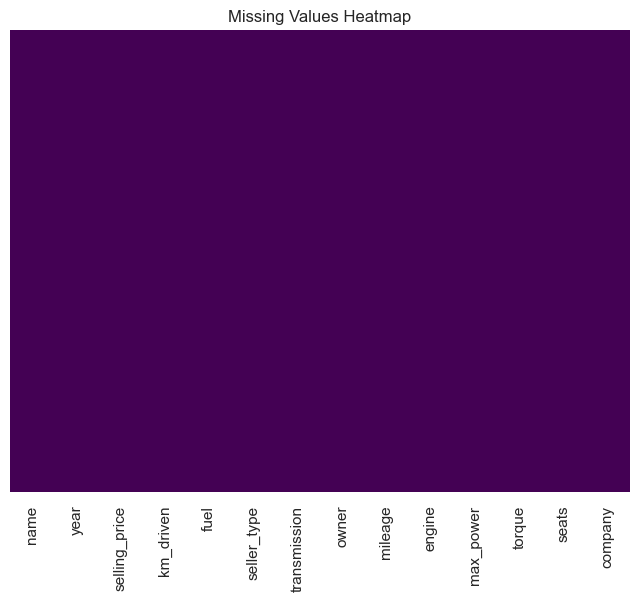

In [739]:
plt.figure(figsize=(8, 6))
sns.heatmap(clean_data.isnull(), cbar=False, cmap='viridis', yticklabels=False, xticklabels=clean_data.columns)
plt.title('Missing Values Heatmap')
plt.show()

In [740]:
#Checking categorical variables

for i in ['fuel','owner','transmission','seller_type']:
    print("\n{} : {} categories: {}".format(i, clean_data[i].nunique(), clean_data[i].unique()))


fuel : 4 categories: ['Diesel' 'Petrol' 'LPG' 'CNG']

owner : 5 categories: ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']

transmission : 2 categories: ['Manual' 'Automatic']

seller_type : 3 categories: ['Individual' 'Dealer' 'Trustmark Dealer']


In [741]:
#Factorizing categorical data

# categorical_col = ['fuel','owner','transmission','seller_type']
# clean_data[categorical_col] = clean_data[categorical_col].apply(lambda x: pd.factorize(x)[0])

In [742]:
clean_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,company
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti


In [743]:
#Extracting new column from existing one: "Years_used"
current_year = 2025
clean_data["years_used"] = current_year - clean_data['year']

C:\Users\jblbo\AppData\Local\Temp\ipykernel_21260\3181133198.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["years_used"] = current_year - clean_data['year']


In [744]:
type(clean_data['max_power'][0])

str

In [745]:
int(clean_data['max_power'][0].split()[0])

74

In [746]:
#Removing units from data

clean_data['max_power'] = clean_data['max_power'].apply(lambda x: float(x.split()[0]))
clean_data['mileage'] = clean_data['mileage'].apply(lambda x: float(x.split()[0]))
clean_data['engine'] = clean_data['engine'].apply(lambda x: int(x.split()[0]))

C:\Users\jblbo\AppData\Local\Temp\ipykernel_21260\3779353467.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['max_power'] = clean_data['max_power'].apply(lambda x: float(x.split()[0]))
C:\Users\jblbo\AppData\Local\Temp\ipykernel_21260\3779353467.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['mileage'] = clean_data['mileage'].apply(lambda x: float(x.split()[0]))
C:\Users\jblbo\AppData\Local\Temp\ipykernel_21260\3779353467.py:5: SettingWithCopyWarning: 
A value is trying to be 

In [747]:
clean_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,company,years_used
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5.0,Maruti,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,Skoda,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0,Hyundai,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5.0,Hyundai,12
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,Hyundai,18
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,190Nm@ 2000rpm,5.0,Maruti,16
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,140Nm@ 1800-3000rpm,5.0,Tata,12


In [748]:
#Extracting required features

cars = clean_data[['years_used','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats','selling_price']]

In [749]:
cars

,years_used,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,11,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,450000
1,11,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,370000
2,19,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,158000
3,15,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,225000
4,18,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,130000
...,...,...,...,...,...,...,...,...,...,...,...
8123,12,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0,320000
8124,18,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0,135000
8125,16,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,5.0,382000
8126,12,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,5.0,290000


In [750]:
#cars.to_csv("../../data/Final_Data.csv")

In [751]:
#Data Normalization
numerical_columns = ['years_used', 'km_driven', 'mileage', 'engine', 'max_power', 'seats','selling_price']
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
)

cars_scaled = preprocessor.fit_transform(cars)

# Get feature names from the OneHotEncoder and combine with numerical column names
ohe_col_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
all_cols = numerical_columns + list(ohe_col_names)

# Create a new DataFrame
cars_scaled = pd.DataFrame(cars_scaled, columns=all_cols)

cars_scaled

cars_scaled.to_csv("../../data/joint_data_collection.csv", index=False)


In [752]:
#Splitting dataset

train, test = train_test_split(cars_scaled, test_size=0.2, random_state=42)
train.to_csv("../../data/training_data.csv", index=False)
test.to_csv("../../data/test_data.csv", index=False)

In [753]:
# Extracting one random entry from test data

activation_data = test.sample(n=1, random_state=42)
activation_data.to_csv("../../data/activation_data.csv", index=False)